In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
csv_path = "static/data/michigan-data.csv"
test_df = pd.read_csv(csv_path)
test_df.head(10)

,date,deathConfirmed,deathIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,3/7/2021,15666.0,0,866.0,656072,0,549881.0,10621967.0,0
1,3/6/2021,15666.0,57,866.0,656072,1692,549881.0,10621967.0,37232
2,3/5/2021,15610.0,12,866.0,654380,1791,541258.0,10584735.0,46112
3,3/4/2021,15600.0,39,890.0,652589,1827,541258.0,10538623.0,46486
4,3/3/2021,15563.0,6,882.0,650762,1705,541258.0,10492137.0,36453
5,3/2/2021,15558.0,25,959.0,649057,1642,541258.0,10455684.0,19406
6,3/1/2021,15534.0,11,893.0,647415,1865,541258.0,10436278.0,48387
7,2/28/2021,15522.0,0,841.0,645550,0,541258.0,10387891.0,0
8,2/27/2021,15522.0,70,841.0,645550,1425,541258.0,10387891.0,36981
9,2/26/2021,15454.0,2,841.0,644125,1257,529080.0,10350910.0,41966


In [3]:
test_df.describe()

,deathConfirmed,deathIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
count,370.000000,372.000000,333.000000,372.000000,372.000000,339.000000,3.630000e+02,372.000000
mean,7445.918919,44.779570,1601.495495,222667.403226,1763.596774,161681.053097,3.930972e+06,28553.674731
std,4178.515386,56.987726,1190.935283,218523.327068,2420.486970,167874.200932,3.470624e+06,26621.632764
min,0.000000,-4.000000,471.000000,14.000000,0.000000,56.000000,3.000000e+00,0.000000
25%,5659.000000,6.000000,661.000000,64030.500000,401.000000,50194.500000,7.629800e+05,7355.000000
50%,6522.500000,19.500000,959.000000,114855.000000,899.000000,90216.000000,2.995886e+06,23402.500000
75%,9805.750000,65.000000,2480.000000,421845.000000,1785.750000,236369.000000,7.089178e+06,42139.250000
max,15666.000000,288.000000,4326.000000,656072.000000,17368.000000,549881.000000,1.062197e+07,183614.000000


In [4]:
test_df.dtypes

date                         object
deathConfirmed              float64
deathIncrease                 int64
hospitalizedCurrently       float64
positive                      int64
positiveIncrease              int64
recovered                   float64
totalTestResults            float64
totalTestResultsIncrease      int64
dtype: object

In [5]:
test_df['date'] = pd.to_datetime(test_df.date)
# test_df = test_df["date"].dt.strftime("%m/%d/%y")
test_df.head()

,date,deathConfirmed,deathIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2021-03-07,15666.0,0,866.0,656072,0,549881.0,10621967.0,0
1,2021-03-06,15666.0,57,866.0,656072,1692,549881.0,10621967.0,37232
2,2021-03-05,15610.0,12,866.0,654380,1791,541258.0,10584735.0,46112
3,2021-03-04,15600.0,39,890.0,652589,1827,541258.0,10538623.0,46486
4,2021-03-03,15563.0,6,882.0,650762,1705,541258.0,10492137.0,36453


In [6]:
test_df.sort_values(by=['date'], inplace=True)
test_df.head()

,date,deathConfirmed,deathIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
371,2020-03-01,0.0,0,NaN,14,0,NaN,NaN,0
370,2020-03-02,NaN,0,NaN,27,13,NaN,NaN,0
369,2020-03-03,NaN,0,NaN,50,23,NaN,NaN,0
368,2020-03-04,0.0,0,NaN,74,24,NaN,NaN,0
367,2020-03-05,0.0,0,NaN,100,26,NaN,NaN,0


In [7]:
test_df['year'] = test_df.date.dt.year
test_df['month'] =test_df.date.dt.month
test_df['day'] = test_df.date.dt.day
test_df.drop('date', axis=1, inplace=True)



In [8]:
test_df.head()

,deathConfirmed,deathIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease,year,month,day
371,0.0,0,NaN,14,0,NaN,NaN,0,2020,3,1
370,NaN,0,NaN,27,13,NaN,NaN,0,2020,3,2
369,NaN,0,NaN,50,23,NaN,NaN,0,2020,3,3
368,0.0,0,NaN,74,24,NaN,NaN,0,2020,3,4
367,0.0,0,NaN,100,26,NaN,NaN,0,2020,3,5


In [9]:
#grab 2020


# test2020_df = test_df.loc[test_df['year'] == "2020",:]
test2020_df = test_df[test_df.year.eq(2020)]

print(test2020_df)

test2020_df = pd.DataFrame(test2020_df)



     deathConfirmed  deathIncrease  hospitalizedCurrently  positive  \
371             0.0              0                    NaN        14   
370             NaN              0                    NaN        27   
369             NaN              0                    NaN        50   
368             0.0              0                    NaN        74   
367             0.0              0                    NaN       100   
..              ...            ...                    ...       ...   
70          12029.0              0                 3108.0    516326   
69          12089.0             64                 2811.0    519876   
68          12282.0            212                 2906.0    523839   
67          12333.0             52                 2758.0    528621   
66          12333.0              0                 2758.0    528621   

     positiveIncrease  recovered  totalTestResults  totalTestResultsIncrease  \
371                 0        NaN               NaN                 

In [10]:
#get monthly summary statistics from 2020

monthgroup = test2020_df.groupby(by='month')


mean = monthgroup['positive'].mean()
median =monthgroup['positive'].median()
std = monthgroup['positive'].std()
SEM = monthgroup['positive'].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
monthgroup_df = pd.DataFrame({"Mean Positive Cases": mean, "Median Positive Cases": median, "Standard Deviation": std, "SEM": SEM})

#print table
monthgroup_df


,Mean Positive Cases,Median Positive Cases,Standard Deviation,SEM
month,,,,
3,5472.967742,2895.0,6004.935889,1078.518324
4,34556.000000,34994.0,8106.666967,1480.068121
5,56977.225806,58023.0,5015.288810,900.772461
6,66722.900000,66177.0,1995.276480,364.285979
7,79953.903226,79839.0,5944.110252,1067.593717
8,101958.290323,102259.0,6653.225900,1194.954647
9,125408.533333,125355.5,7205.308540,1315.503340
10,161279.387097,159119.0,17145.058479,3079.343406
11,287424.433333,282373.0,59808.483719,10919.485221


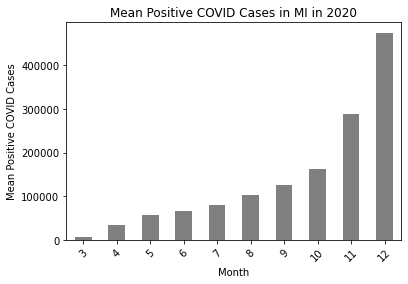

In [11]:
#2020 graph

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mean2020_df = monthgroup_df["Mean Positive Cases"]

#del drugcount_df["Drug Regimen"]



mean2020bar = mean2020_df.plot(kind= 'bar', color="gray", rot=45, legend=False)
plt.title("Mean Positive COVID Cases in MI in 2020")
plt.xlabel('Month')
plt.ylabel("Mean Positive COVID Cases")
plt.show()

plt.savefig('test.pdf')

In [15]:
# make 2021 graph for Mean COVID cases in MI 

#grab 2021


test2021_df = test_df[test_df.year.eq(2021)]

# print(test2021_df)

test2021_df = pd.DataFrame(test2021_df)

#get monthly summary statistics from 2021

monthgroup2 = test2021_df.groupby(by='month')


mean2 = monthgroup2['positive'].mean()
median2 =monthgroup2['positive'].median()
std2 = monthgroup2['positive'].std()
SEM2 = monthgroup2['positive'].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
monthgroup2021_df = pd.DataFrame({"Mean Positive Cases": mean2, "Median Positive Cases": median2, "Standard Deviation": std2, "SEM": SEM2})

#print table
monthgroup2021_df


,Mean Positive Cases,Median Positive Cases,Standard Deviation,SEM
month,,,,
1,577518.483871,581785,23850.294732,4283.639389
2,629961.214286,629682,9787.019360,1849.572807
3,652335.285714,652589,3405.948019,1287.327348


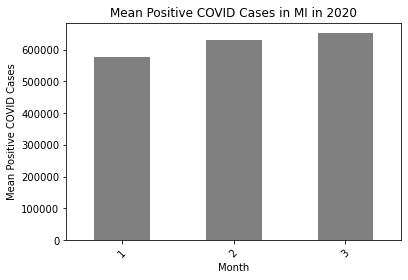

In [16]:
#2020 graph

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mean2021_df = monthgroup2021_df["Mean Positive Cases"]

#del drugcount_df["Drug Regimen"]



mean2021bar = mean2021_df.plot(kind= 'bar', color="gray", rot=45, legend=False)
plt.title("Mean Positive COVID Cases in MI in 2020")
plt.xlabel('Month')
plt.ylabel("Mean Positive COVID Cases")
plt.show()